# Neural Network

In [15]:
import sklearn.datasets as sk_datasets
import sklearn.preprocessing as sk_preprocessing
import sklearn.metrics as sk_metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load and examine the iris dataset.

In [16]:
df = sk_datasets.load_digits(as_frame=True).frame
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
for unique_target in df.target.unique():
    print(f"Target {unique_target} has {df[df.target == unique_target].shape[0]} samples")

Target 0 has 178 samples
Target 1 has 182 samples
Target 2 has 177 samples
Target 3 has 183 samples
Target 4 has 181 samples
Target 5 has 182 samples
Target 6 has 181 samples
Target 7 has 179 samples
Target 8 has 174 samples
Target 9 has 180 samples


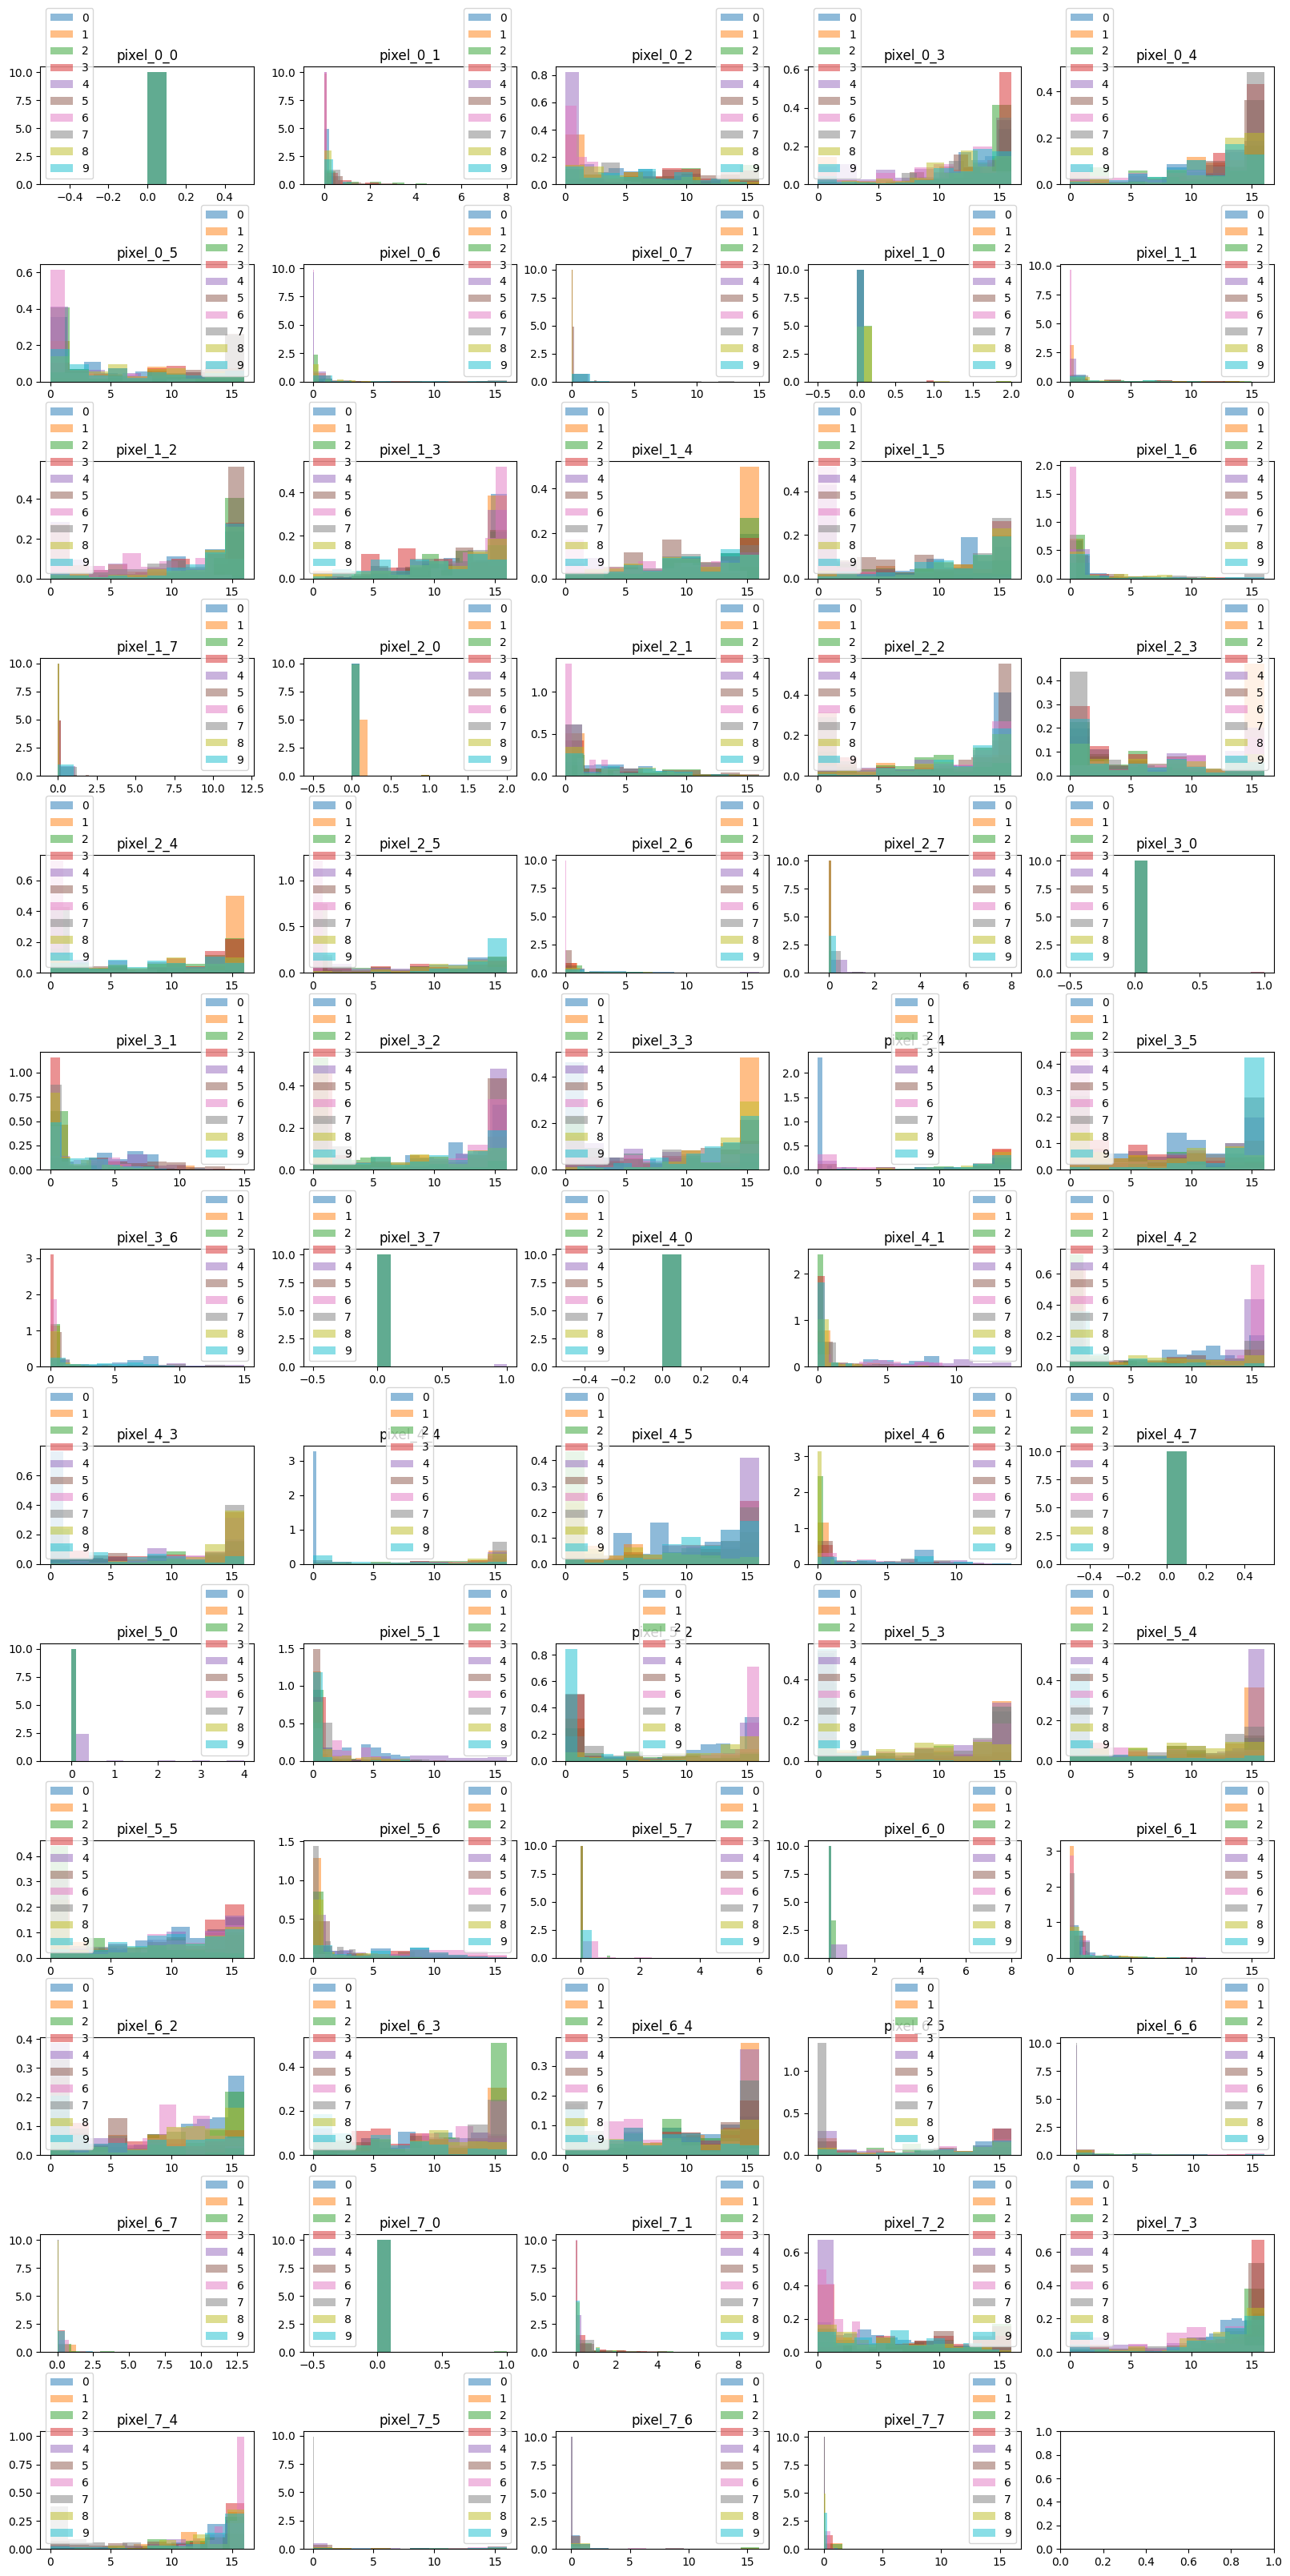

In [18]:
unique_labels = df['target'].unique()
features = df.columns[:-1]

fig, axs = plt.subplots(ncols=5, nrows=13, figsize=(16, 32), layout='constrained')

for i, label in enumerate(features):
    axis = axs[i // 5][i % 5]
    for unique_label in unique_labels:
        axis.hist(df[label][df['target'] == unique_label], alpha=0.5, label=unique_label, density=True)
    axis.set_title(label)
    axis.legend()

plt.show()

Transform and prepare data.

In [19]:
train, test = np.split(df.sample(frac=1), [int(.8*len(df))])

/Users/philipcastiglione/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
def scale_dataset(dataframe: pd.DataFrame):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe['target'].values

    scaler = sk_preprocessing.StandardScaler()
    X = scaler.fit_transform(X)
    
    data = np.hstack((X, y.reshape(-1, 1)))

    return data, X, y

In [21]:
train, X_train, y_train = scale_dataset(train)
test, X_test, y_test = scale_dataset(test)

In [22]:
nn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/philipcastiglione/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2301 - loss: 2.1758 - val_accuracy: 0.6875 - val_loss: 1.3869
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.7716 - loss: 1.1457 - val_accuracy: 0.8681 - val_loss: 0.6872
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.8973 - loss: 0.5205 - val_accuracy: 0.9201 - val_loss: 0.3732
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.9452 - loss: 0.2865 - val_accuracy: 0.9444 - val_loss: 0.2565
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9616 - loss: 0.1918 - val_accuracy: 0.9549 - val_loss: 0.2007
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.9758 - loss: 0.1441 - val_accuracy: 0.9653 - val_loss: 0.1709
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9885 - loss: 0.0938 - val_accuracy: 0.9618 - val_loss: 0.1507
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9906 - loss: 0.0779 - val_accura

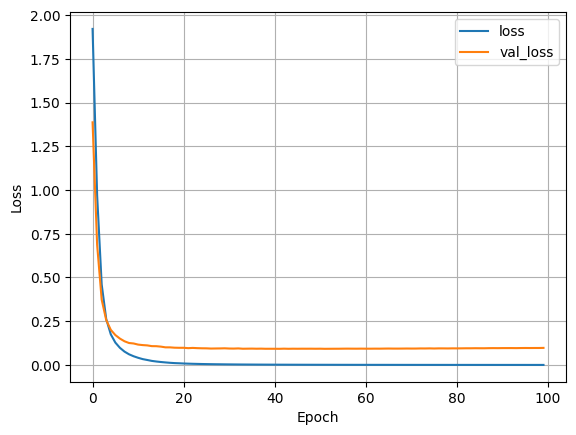

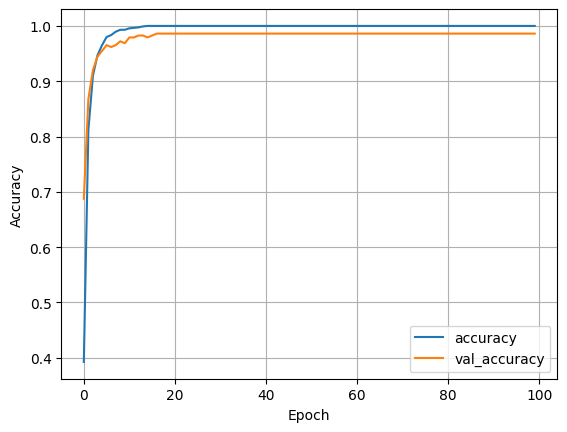

In [25]:
plot_loss(history)
plot_accuracy(history)

In [27]:
val_loss, val_accuracy = nn_model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.1238 


In [28]:
y_pred = nn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [30]:
print(sk_metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        41
           2       1.00      0.97      0.99        39
           3       0.91      0.94      0.93        34
           4       1.00      0.95      0.97        38
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        33
           7       0.97      1.00      0.98        32
           8       0.94      0.91      0.93        35
           9       0.97      0.97      0.97        35

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360

